In [2]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [3]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [4]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Oops, keys will forever be in repo history 
# print(PLAID_CLIENT_ID,PLAID_SBX_SECRET_KEY,PLAID_PUBLIC_KEY)

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')
print(client)

### 2. Generate a public token

In [6]:
# YOUR CODE HERE
INSTITUTION_ID = "ins_109508"

# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [7]:
# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
# Store access token as variable
access_token = exchange_response['access_token']

print(access_token)

access-sandbox-8c97a8cb-4e26-480f-8f83-427841a970f6


### 4. Fetch Accounts

In [8]:
client.Accounts.get(access_token)

{'accounts': [{'account_id': '5Rzx53Nn98HwW48NbqK5iry3gKgQmxiZlMn7A',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'J6daVAzw7XUdgp3keGQEIRNvaZaLBxud3qygq',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'kPXbALaM8BH9lWX3Qy7wfkznMwMAbxFWnKjdd',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [9]:
# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print JSON output
transactions_list = json.dumps(transaction_response['transactions'],indent=4, sort_keys=True)
print(transactions_list)

[
    {
        "account_id": "ljgWAp4my3S4kjW3AXNQSJjQ7w7mrpfZQ8qd7",
        "account_owner": null,
        "amount": 500,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2019-09-03",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "United Airlines",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
        "pending_transaction_id": null,
        "transaction

### 2. Print the categories for each transaction

In [10]:
transactions = transaction_response['transactions']
all_categories = []
for tran in transactions:
    category = tran['category'][0]
    all_categories.append(category)
    print(category)
    

Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [11]:
transactions = transaction_response['transactions']

all_dates = []
all_seller_name = []
all_amount = []
all_categories = []

for tran in transactions:
    category = tran['category'][0]
    all_categories.append(category)
    all_dates.append(tran['date'])
    all_seller_name.append(tran['name'])
    all_amount.append(tran['amount'])

for i in range(len(all_dates)):
    print(f"{all_dates[i]} {all_seller_name[i]} \t ${all_amount[i]} Cat: {all_categories[i]}")

df = pd.DataFrame(list(zip(all_dates,all_seller_name,all_amount,all_categories)), 
                columns =['Date','Seller','Amount','Category'])
df.head()

2019-09-03 United Airlines 	 $500 Cat: Travel
2019-09-01 Uber 072515 SF**POOL** 	 $6.33 Cat: Travel
2019-08-29 Tectra Inc 	 $500 Cat: Food and Drink
2019-08-28 AUTOMATIC PAYMENT - THANK 	 $2078.5 Cat: Payment
2019-08-28 KFC 	 $500 Cat: Food and Drink
2019-08-28 Madison Bicycle Shop 	 $500 Cat: Shops
2019-08-19 CREDIT CARD 3333 PAYMENT *// 	 $25 Cat: Payment
2019-08-19 Uber 063015 SF**POOL** 	 $5.4 Cat: Travel
2019-08-18 ACH Electronic CreditGUSTO PAY 123456 	 $5850 Cat: Transfer
2019-08-18 CD DEPOSIT .INITIAL. 	 $1000 Cat: Transfer
2019-08-17 Touchstone Climbing 	 $78.5 Cat: Recreation
2019-08-17 United Airlines 	 $-500 Cat: Travel
2019-08-16 McDonald's 	 $12 Cat: Food and Drink
2019-08-16 Starbucks 	 $4.33 Cat: Food and Drink
2019-08-15 SparkFun 	 $89.4 Cat: Food and Drink
2019-08-14 INTRST PYMNT 	 $-4.22 Cat: Transfer


,Date,Seller,Amount,Category
0,2019-09-03,United Airlines,500.00,Travel
1,2019-09-01,Uber 072515 SF**POOL**,6.33,Travel
2,2019-08-29,Tectra Inc,500.00,Food and Drink
3,2019-08-28,AUTOMATIC PAYMENT - THANK,2078.50,Payment
4,2019-08-28,KFC,500.00,Food and Drink


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [12]:
df['Seller'].astype('str')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
print(df.dtypes)
df.head()

Seller       object
Amount      float64
Category     object
dtype: object


,Seller,Amount,Category
Date,,,
2019-09-03,United Airlines,500.00,Travel
2019-09-01,Uber 072515 SF**POOL**,6.33,Travel
2019-08-29,Tectra Inc,500.00,Food and Drink
2019-08-28,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2019-08-28,KFC,500.00,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [14]:
client.Accounts.get(access_token)
resp = client.Income.get(access_token)
last_year_gross_income = resp['income']['last_year_income_before_tax']
monthly_income = resp['income']['income_streams'][0]['monthly_income']
projected_yearly_income = monthly_income * 12

print(f"1. Previous Year's Gross Income: ${last_year_gross_income:,}")
print(f"2. Current Monthly Income: ${monthly_income}")
print(f"3. Projected Yearly Income: ${projected_yearly_income:,}")

# I'm so digging the fstring formats in python
# source: https://stackoverflow.com/questions/1823058/how-to-print-number-with-commas-as-thousands-separators

1. Previous Year's Gross Income: $7,285
2. Current Monthly Income: $500
3. Projected Yearly Income: $6,000


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

                Total Spending Per Category
Category                                   
Transfer                            6845.78
Payment                             2103.50
Food and Drink                      1105.73
Shops                                500.00
Recreation                            78.50
Travel                                11.73
                               Seller   Amount        Category
Date                                                          
2019-09-03            United Airlines   500.00          Travel
2019-09-01     Uber 072515 SF**POOL**     6.33          Travel
2019-08-29                 Tectra Inc   500.00  Food and Drink
2019-08-28  AUTOMATIC PAYMENT - THANK  2078.50         Payment
2019-08-28                        KFC   500.00  Food and Drink


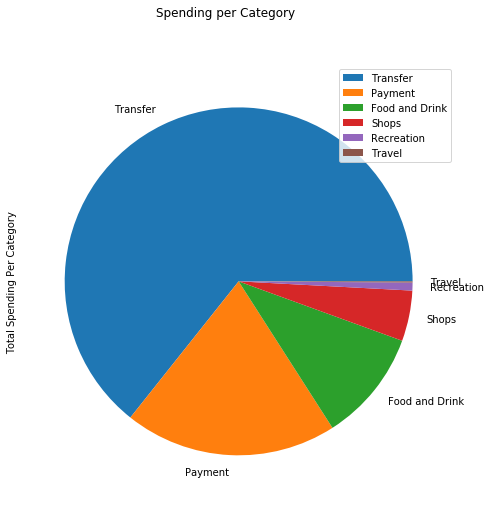

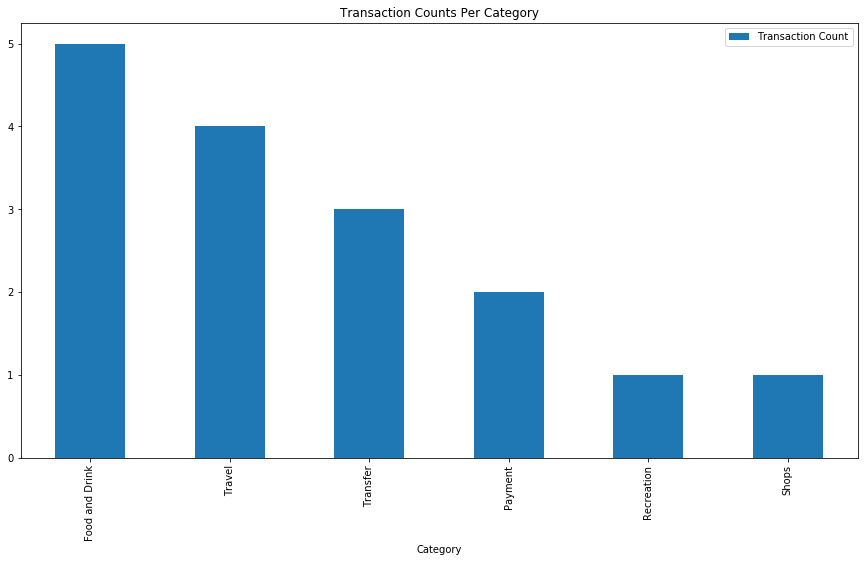

In [16]:
df_category_sum = df.filter(['Category','Amount'])
grouped = df_category_sum.groupby(['Category']).sum()
grouped.columns = ['Total Spending Per Category']
grouped.sort_values('Total Spending Per Category',ascending=False,inplace=True)
print(grouped)
grouped.plot.pie(subplots=True,figsize=(15,8), title="Spending per Category")

grouped_count = df.filter(['Category','Amount']).groupby(['Category']).count()
grouped_count.columns = ['Transaction Count']
grouped_count.sort_values('Transaction Count',ascending=False,inplace=True)
grouped_count.plot.bar(figsize=(15,8), title="Transaction Counts Per Category")
print(df.head())

### Calculate the expenses per month

In [22]:
df_amounts = df.filter(['Date','Amount'])
df_amounts.index = pd.to_datetime(df_amounts.index)
#print(df_amounts.head())
#df_amounts.columns = ['Month Num','Expenses']
#df_amounts.set_index(['Month Num'],inplace=True)
month_grouped = df_amounts.groupby(df_amounts.index.month).sum()
month_grouped.sort_index()
print(month_grouped)

        Amount
Date          
6     10645.24
7     10645.24
8     10645.24


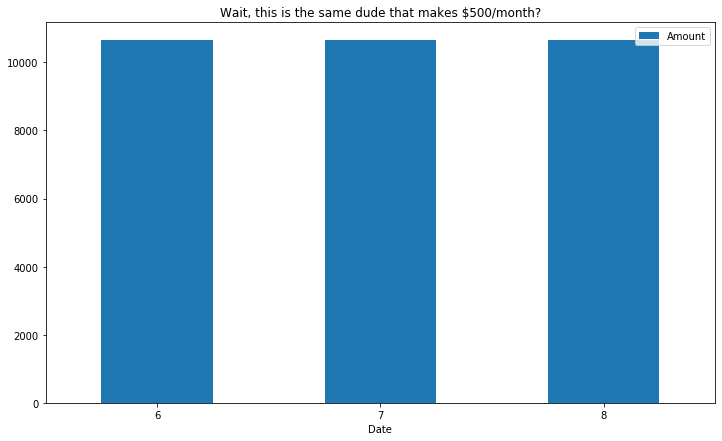

In [23]:
month_grouped.plot(kind='bar',rot=0, title="Wait, this is the same dude that makes $500/month?", figsize=(12,7))